# Лабораторная работа 2. Математическое прогнозирование


In [1]:
import pandas as pd
import numpy as np
import random

# Настройка seed для воспроизводимости
np.random.seed(42)
random.seed(42)

# Создание временного диапазона (10 лет, помесячно)
dates = pd.date_range(start='2013-01-01', end='2022-12-31', freq='M')
n = len(dates)

# Генерация базовых данных с трендом и сезонностью
def generate_trend(base, growth, n):
    return np.array([base + growth*i for i in range(n)])

def generate_seasonality(n, amplitude, phase_shift=0):
    return amplitude * np.sin(2 * np.pi * np.arange(n) / 12 + phase_shift)

# 1. Average Temperature (сезонность ярко выражена)
temp_trend = generate_trend(10, 0.02, n)  # небольшой тренд на потепление
temp_seasonality = generate_seasonality(n, 10)
temperature = temp_trend + temp_seasonality + np.random.normal(0, 1, n)

# 2. Daylight Hours (сезонность)
daylight = 12 + 4 * np.sin(2 * np.pi * np.arange(n) / 12 - np.pi/2) + np.random.normal(0, 0.3, n)

# 3. Industry Consumption (тренд + сезонность)
ind_trend = generate_trend(50000, 30, n)  # рост потребления
ind_seasonality = generate_seasonality(n, 2000, np.pi/2)
industry = ind_trend + ind_seasonality + np.random.normal(0, 1000, n)

# 4. Household Consumption (сезонность + тренд)
house_trend = generate_trend(20000, 15, n)
house_seasonality = generate_seasonality(n, 3000, np.pi)
household = house_trend + house_seasonality + np.random.normal(0, 800, n)

# Добавление выбросов
def add_outliers(data, num_outliers, scale=5):
    outliers = random.sample(range(len(data)), num_outliers)
    for i in outliers:
        data[i] += scale * np.std(data) * (1 if random.random() > 0.5 else -1)
    return data, outliers

industry, ind_outliers = add_outliers(industry, 5, 4)
household, house_outliers = add_outliers(household, 4, 5)
temperature, temp_outliers = add_outliers(temperature, 3, 3)

# Добавление пропущенных значений
def add_missing(data, num_missing):
    missing = random.sample(range(len(data)), num_missing)
    for i in missing:
        data[i] = np.nan
    return data, missing

industry, ind_missing = add_missing(industry, 3)
household, house_missing = add_missing(household, 4)
temperature, temp_missing = add_missing(temperature, 2)
daylight, day_missing = add_missing(daylight, 1)

# Создание DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Industry_Consumption_MWh': industry,
    'Household_Consumption_MWh': household,
    'Average_Temperature_C': temperature,
    'Daylight_Hours': daylight
})

# Добавление дубликатов (3 случайные строки)
duplicates = data.sample(3, random_state=42)
data = pd.concat([data, duplicates]).sort_values('Date').reset_index(drop=True)

# Сохранение
data.to_csv('energy_consumption_dataset.csv', index=False)
print("Датасет успешно создан и сохранен как 'energy_consumption_dataset.csv'")

Датасет успешно создан и сохранен как 'energy_consumption_dataset.csv'


C:\Users\Таня\AppData\Local\Temp\ipykernel_10748\2278272033.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2013-01-01', end='2022-12-31', freq='M')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Устанавливаем сид для воспроизводимости
np.random.seed(42)

# Генерируем даты
dates = pd.date_range(start='2015-01-01', periods=120, freq='M')

# Сезонные компоненты (синусоиды с разной амплитудой и фазой)
months = np.arange(120)
seasonal_pattern = np.sin(2 * np.pi * months / 12)

# 1. Промышленное потребление (тренд вверх + сезонность зима↑)
industry_trend = np.linspace(1000, 1240, 120)
industry = industry_trend + 80 * (-seasonal_pattern) + np.random.normal(0, 20, 120)

# Добавим выбросы
for i in random.sample(range(120), 5):
    industry[i] += random.choice([-300, 300])

# 2. Бытовое потребление (умеренный тренд + зима↑ и лето↑)
household_trend = np.linspace(800, 960, 120)
household = household_trend + 60 * np.abs(seasonal_pattern) + np.random.normal(0, 15, 120)

# Вставим пропуски
for i in random.sample(range(120), 5):
    household[i] = np.nan

# 3. Средняя температура (лёгкий восходящий тренд + синусоида)
temp_trend = np.linspace(0, 1.5, 120)
temp = 10 + 10 * seasonal_pattern + temp_trend + np.random.normal(0, 1.5, 120)

# 4. Световой день (синусоида, нет тренда)
daylight = 12 + 4 * seasonal_pattern

# Финальный DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Industry_Consumption_MWh': industry,
    'Household_Consumption_MWh': household,
    'Average_Temperature_C': temp,
    'Daylight_Hours': daylight
})

# Сохраняем в CSV (если нужно)
data.to_csv('seasonal_timeseries_data.csv', index=False)

# Просмотр первых строк
print(data.head())


        Date  Industry_Consumption_MWh  Household_Consumption_MWh  \
0 2015-01-31               1009.934283                 811.865479   
1 2015-02-28                959.251521                        NaN   
2 2015-03-31                947.705352                 875.692515   
3 2015-04-30                956.511017                 843.005848   
4 2015-05-31                934.102127                 866.142532   

   Average_Temperature_C  Daylight_Hours  
0               8.811219       12.000000  
1              14.840500       14.000000  
2              19.442945       15.464102  
3              21.336448       16.000000  
4              16.910230       15.464102  


C:\Users\Таня\AppData\Local\Temp\ipykernel_10368\2790732957.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2015-01-01', periods=120, freq='M')


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./energy_consumption_dataset.csv')
df

,Date,Industry_Consumption_MWh,Household_Consumption_MWh,Average_Temperature_C,Daylight_Hours
0,2013-01-31,NaN,20415.477211,10.496714,8.237310
1,2013-02-28,51647.314366,19741.191130,14.881736,8.263082
2,2013-03-31,51564.987279,17344.915670,19.347943,10.420838
3,2013-04-30,42251.371577,32667.921687,21.583030,11.579445
4,2013-05-31,47919.703593,32422.076852,18.506101,14.176057
...,...,...,...,...,...
118,2022-08-31,50715.419828,23025.771168,7.601547,15.654277
119,2022-09-30,52461.486864,24799.321782,3.625034,13.392457
120,2022-10-31,53221.341361,25004.000124,1.171322,12.055936
121,2022-11-30,54862.718560,26831.180858,4.842569,9.801464


Посмотрим на общую информацию о данных и их характеристики

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       123 non-null    object 
 1   Industry_Consumption_MWh   120 non-null    float64
 2   Household_Consumption_MWh  119 non-null    float64
 3   Average_Temperature_C      121 non-null    float64
 4   Daylight_Hours             122 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
numerical_features = ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']
df[numerical_features].describe()

,Industry_Consumption_MWh,Household_Consumption_MWh,Average_Temperature_C,Daylight_Hours
count,120.000000,119.000000,121.000000,122.000000
mean,51733.318086,21108.437229,11.273552,12.064963
std,2824.843384,3406.326519,8.085977,2.867817
min,41933.000825,6673.658414,-15.453622,7.586699
25%,50339.774111,18990.258707,4.035252,9.522017
50%,51617.205874,21138.361372,11.303618,12.134288
75%,53235.770945,22815.851487,18.029260,14.593051
max,64145.519603,32667.921687,40.046504,16.643183


Соберем код с описательными статистиками в одну функцию для удобства анализа отдельных признаков

In [6]:
def analyze_feature(df, col):
    import matplotlib.pyplot as plt
    import seaborn as sns

    print(f"Минимум: {df[col].min():.2f}")
    print(f"Максимум: {df[col].max():.2f}")
    print(f"Среднее: {df[col].mean():.2f}")
    print(f"Медиана: {df[col].median():.2f}")
    print(f"Мода: {df[col].mode().values[0]:.2f}")
    print(f"Стандартное отклонение: {df[col].std():.2f}")
    print(f"Количество пропусков: {df[col].isnull().sum()}")

    # Гистограмма + KDE
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Распределение: {col}')
    plt.grid(True)
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Диаграмма размаха: {col}')
    plt.grid(True)
    plt.show()

    # Временной ряд
    plt.figure(figsize=(12, 4))
    plt.plot(df['Date'], df[col], marker='o', linestyle='-', color='steelblue')
    plt.title(f'Временной ряд: {col}')
    plt.xlabel('Дата')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


### Анализ потребления электроэнергии в промышленности

Минимум: 41933.00
Максимум: 64145.52
Среднее: 51733.32
Медиана: 51617.21
Мода: 47919.70
Стандартное отклонение: 2824.84
Количество пропусков: 3


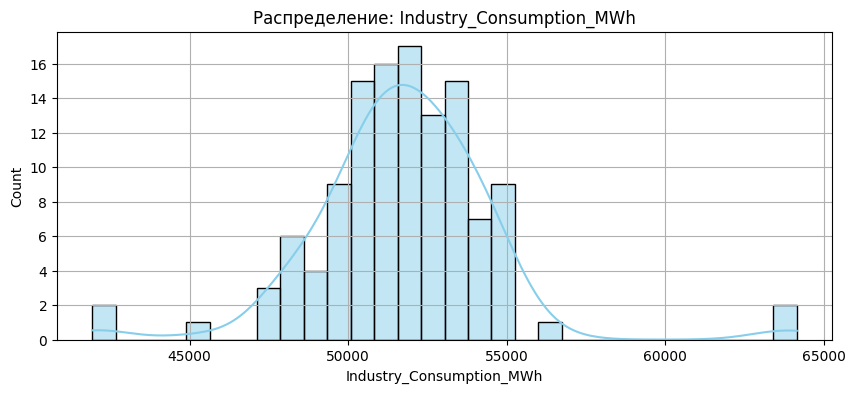

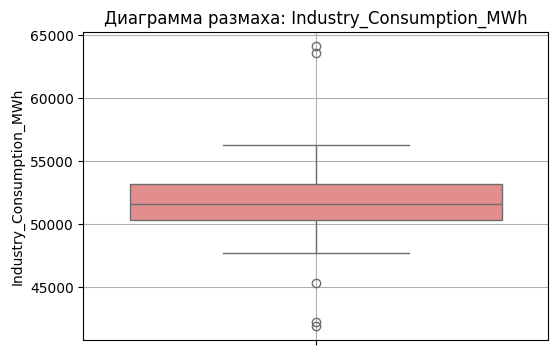

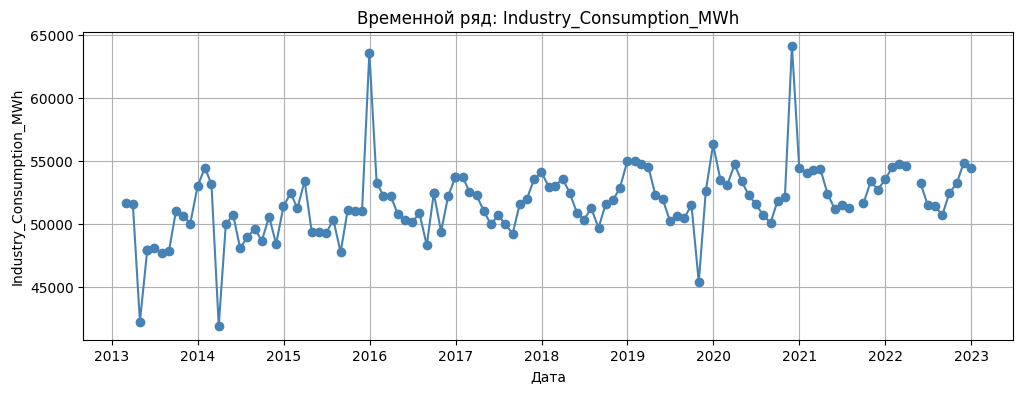

In [7]:
analyze_feature(df, 'Industry_Consumption_MWh')

В данном признаке четко видны выбросы. Для того, чтобы их идентифицировать используем метод IQR

Q1: 50339.77, Q3: 53235.77, IQR: 2896.00
Нижняя граница: 45995.78, Верхняя граница: 57579.77
Количество выбросов: 5


,Date,Industry_Consumption_MWh,Household_Consumption_MWh,Average_Temperature_C,Daylight_Hours
3,2013-04-30,42251.371577,32667.921687,21.583030,11.579445
15,2014-03-31,41933.000825,19334.469755,17.215336,9.724173
36,2015-12-31,63587.094830,21649.659478,4.479156,NaN
84,2019-10-31,45390.905365,24188.844202,1.977113,12.168235
97,2020-11-30,64145.519603,23583.870117,2.827638,9.905419


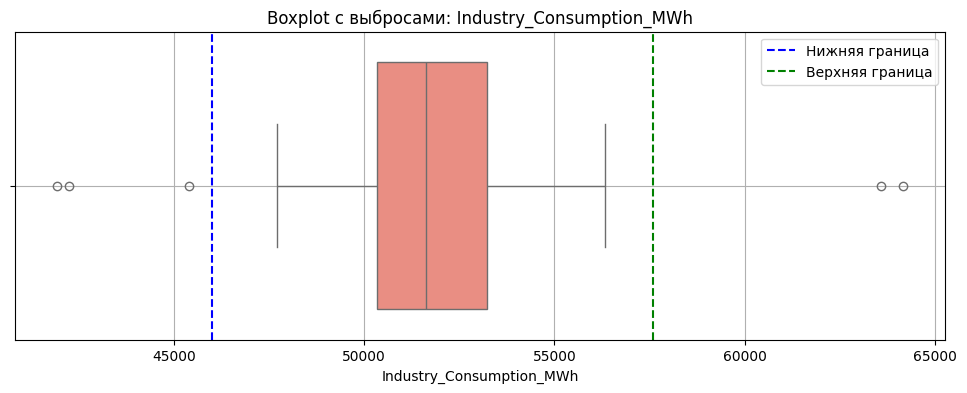

In [ ]:
# Выбираем признак
col = 'Industry_Consumption_MWh'

# Вычисляем квартильные значения
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}')
print(f'Нижняя граница: {lower_bound:.2f}, Верхняя граница: {upper_bound:.2f}')

# Определение выбросов
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Вывод строк с выбросами
display(outliers)

# Визуализация
plt.figure(figsize=(12, 4))
sns.boxplot(x=df[col], color='salmon')
plt.title(f'Boxplot с выбросами: {col}')
plt.axvline(lower_bound, color='blue', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='green', linestyle='--', label='Верхняя граница')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import numpy as np

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


# Повтор вычислений границ выбросов (как раньше)
col = 'Industry_Consumption_MWh'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Строки с выбросами
outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

# Заменяем выбросы на среднее по другим годам того же месяца
for idx in df[outlier_mask].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Все значения за этот месяц, кроме текущего года
    similar_months = df[(df['Month'] == month) & (df['Year'] != year)]

    # Вычисляем среднее значение
    avg_month_value = similar_months[col].mean()

    # Коррекция на тренд: линейная модель по году
    year_diff = year - similar_months['Year'].mean()
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]  # коэффициент наклона

    adjusted_value = avg_month_value + coef * year_diff

    # Обновляем значение
    df.loc[idx, col] = adjusted_value


Минимум: 47705.05
Максимум: 56314.44
Среднее: 51779.40
Медиана: 51835.80
Мода: 47919.70
Стандартное отклонение: 1918.82
Количество пропусков: 4


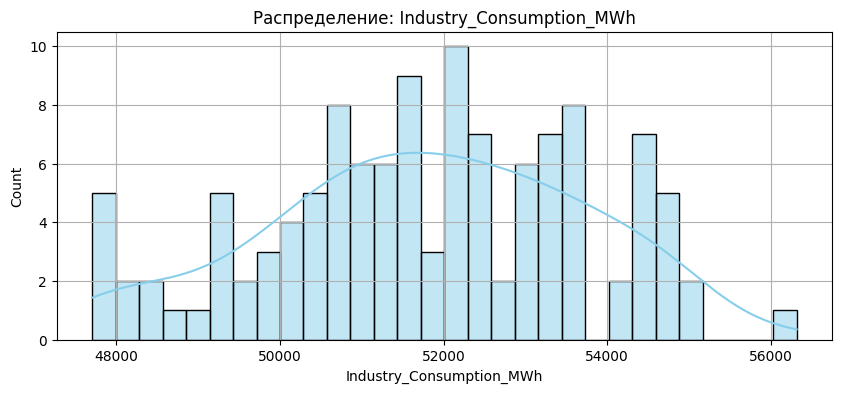

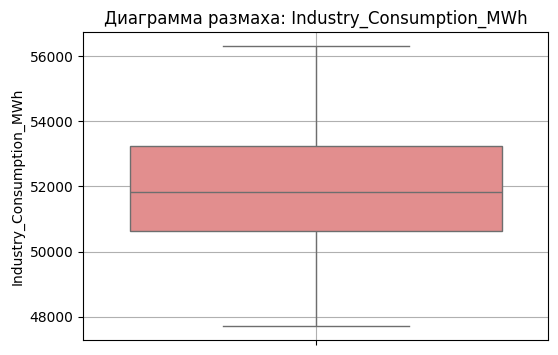

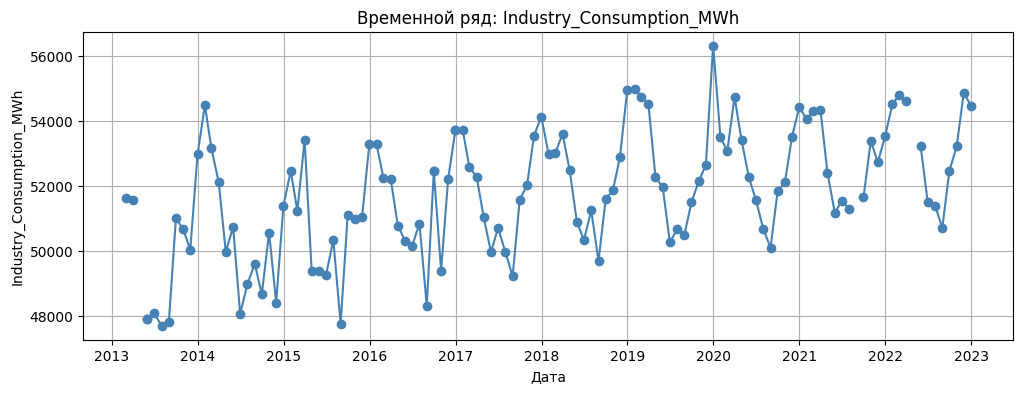

In [145]:
analyze_feature(df, 'Industry_Consumption_MWh')

Минимум: 47705.05
Максимум: 56314.44
Среднее: 51775.74
Медиана: 51835.80
Мода: 47919.70
Стандартное отклонение: 1918.46
Количество пропусков: 0


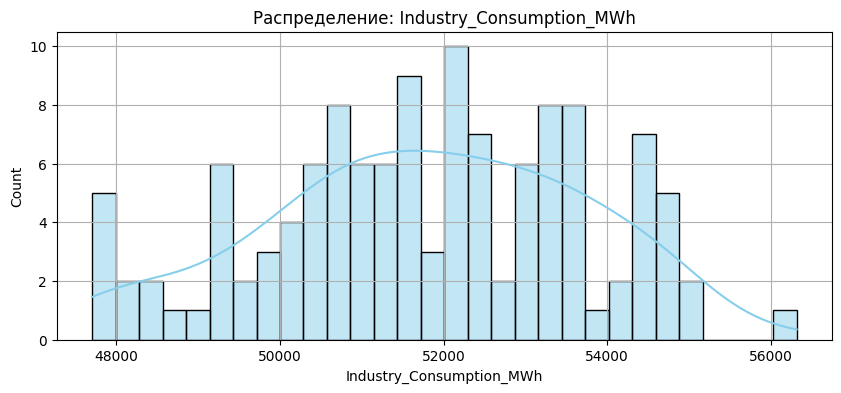

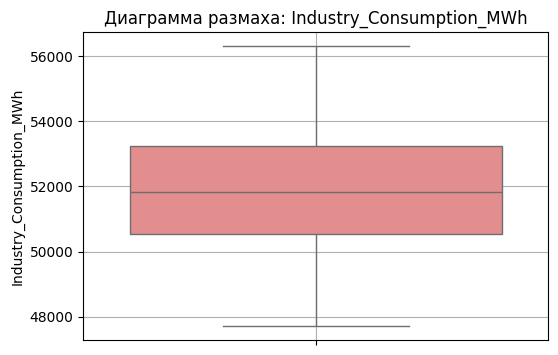

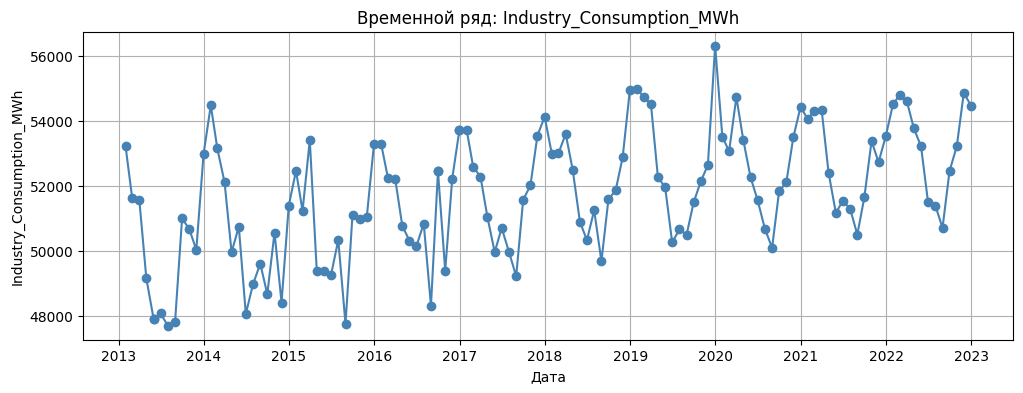

In [13]:
col = 'Industry_Consumption_MWh'

# Проходим по всем строкам с пропусками
col = 'Industry_Consumption_MWh'

for idx in df[df[col].isna()].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Найдём данные за тот же месяц, но в другие годы
    similar_months = df[(df['Month'] == month) & (df['Year'] != year) & (df[col].notna())]

    if similar_months.empty or similar_months['Year'].nunique() < 2:
        # Если недостаточно данных для тренда — пропускаем или заполняем средним по всему столбцу
        df.loc[idx, col] = df[col].mean()
        continue

    # Среднее по этому месяцу
    avg_month_value = similar_months[col].mean()

    # Линейная регрессия: тренд по годам
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]

    year_diff = year - similar_months['Year'].mean()
    adjusted_value = avg_month_value + coef * year_diff

    df.loc[idx, col] = adjusted_value


analyze_feature(df, 'Industry_Consumption_MWh')

### Анализ потребления электроэнергии в быту

Минимум: 6673.66
Максимум: 32667.92
Среднее: 21108.44
Медиана: 21138.36
Мода: 22091.10
Стандартное отклонение: 3406.33
Количество пропусков: 4


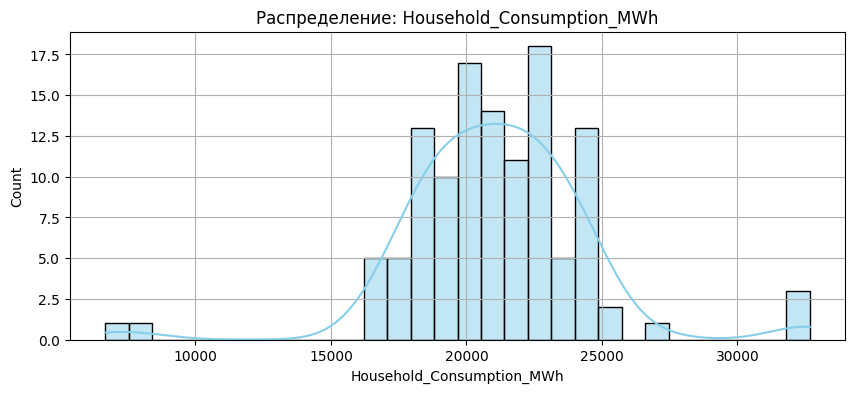

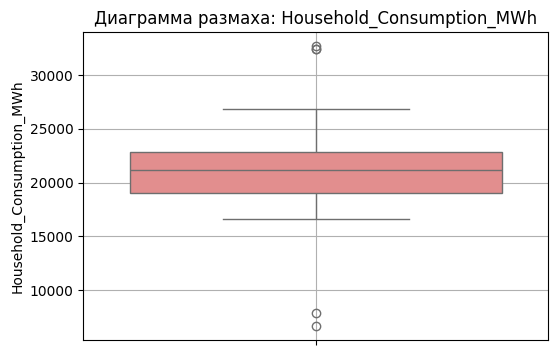

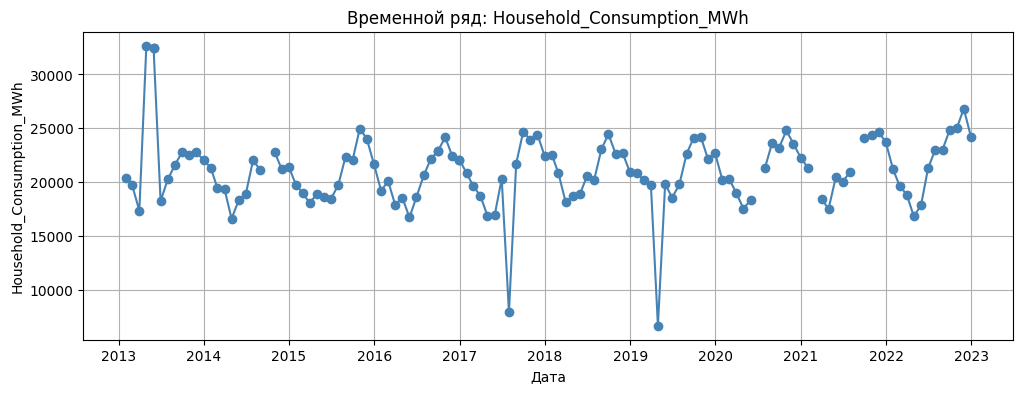

In [14]:
analyze_feature(df, 'Household_Consumption_MWh')

Q1: 18990.26, Q3: 22815.85, IQR: 3825.59
Нижняя граница: 13251.87, Верхняя граница: 28554.24
Количество выбросов: 5


,Date,Industry_Consumption_MWh,Household_Consumption_MWh,Average_Temperature_C,Daylight_Hours,Year,Month
3,2013-04-30,49158.600434,32667.921687,21.583030,11.579445,2013,4
4,2013-05-31,47919.703593,32422.076852,18.506101,14.176057,2013,5
5,2013-05-31,47919.703593,32422.076852,18.506101,14.176057,2013,5
57,2017-07-31,49977.015486,7919.398211,NaN,16.083007,2017,7
78,2019-04-30,52271.003842,6673.658414,22.321903,12.115595,2019,4


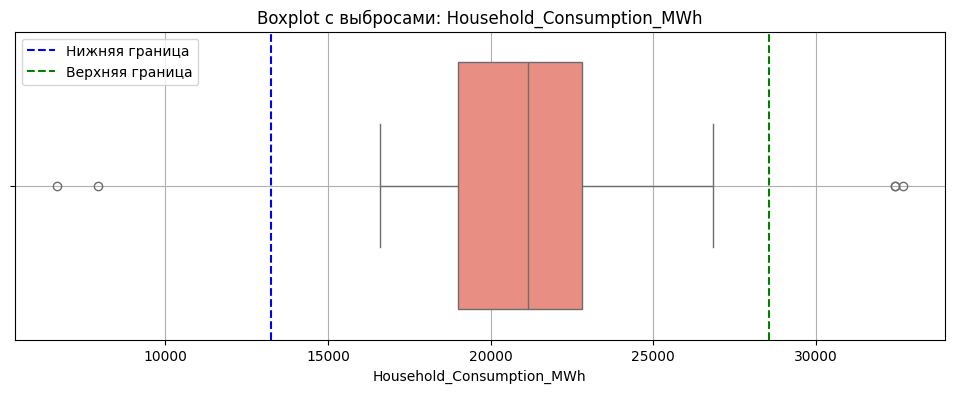

In [15]:
# Выбираем признак
col = 'Household_Consumption_MWh'

# Вычисляем квартильные значения
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}')
print(f'Нижняя граница: {lower_bound:.2f}, Верхняя граница: {upper_bound:.2f}')

# Определение выбросов
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Вывод строк с выбросами
display(outliers)

# Визуализация
plt.figure(figsize=(12, 4))
sns.boxplot(x=df[col], color='salmon')
plt.title(f'Boxplot с выбросами: {col}')
plt.axvline(lower_bound, color='blue', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='green', linestyle='--', label='Верхняя граница')
plt.legend()
plt.grid(True)
plt.show()

Минимум: 16611.12
Максимум: 26831.18
Среднее: 20934.66
Медиана: 20864.47
Мода: 17621.15
Стандартное отклонение: 2331.59
Количество пропусков: 4


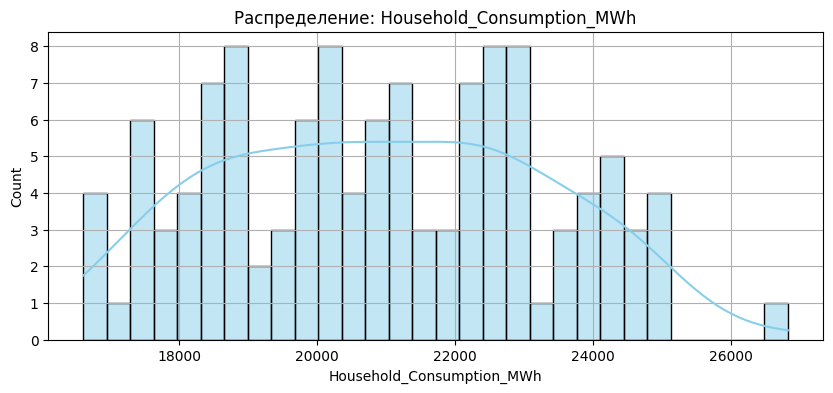

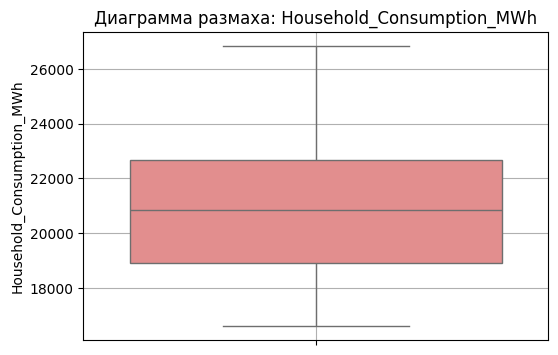

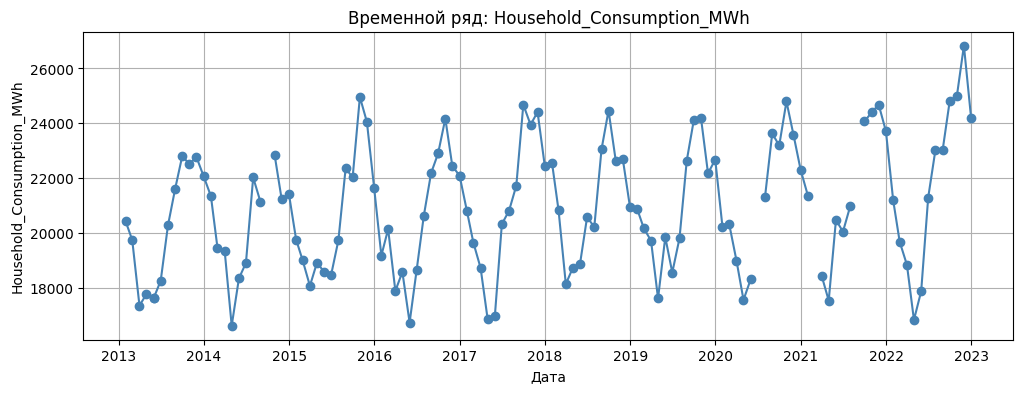

In [17]:
import numpy as np

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


# Повтор вычислений границ выбросов (как раньше)
col = 'Household_Consumption_MWh'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Строки с выбросами
outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

# Заменяем выбросы на среднее по другим годам того же месяца
for idx in df[outlier_mask].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Все значения за этот месяц, кроме текущего года
    similar_months = df[(df['Month'] == month) & (df['Year'] != year)]

    # Вычисляем среднее значение
    avg_month_value = similar_months[col].mean()

    # Коррекция на тренд: линейная модель по году
    year_diff = year - similar_months['Year'].mean()
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]  # коэффициент наклона

    adjusted_value = avg_month_value + coef * year_diff

    # Обновляем значение
    df.loc[idx, col] = adjusted_value

analyze_feature(df, 'Household_Consumption_MWh')    

Здесь присутствуют пропуски, их заполним таким же образом, как заполняли значения с выбросами. Удалять данные не имеет смысла в данном случае, так как пропусков немного и погрешности при заполнении не сильно повлияют на итоговое распределение

Минимум: 16611.12
Максимум: 26831.18
Среднее: 20956.10
Медиана: 20864.47
Мода: 17621.15
Стандартное отклонение: 2310.47
Количество пропусков: 0


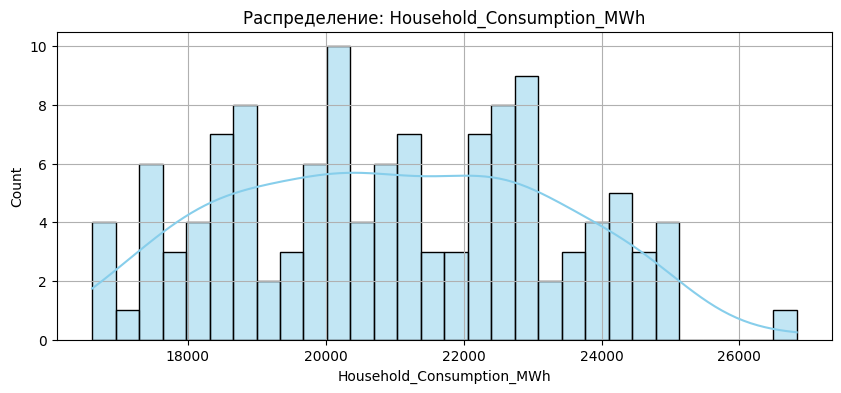

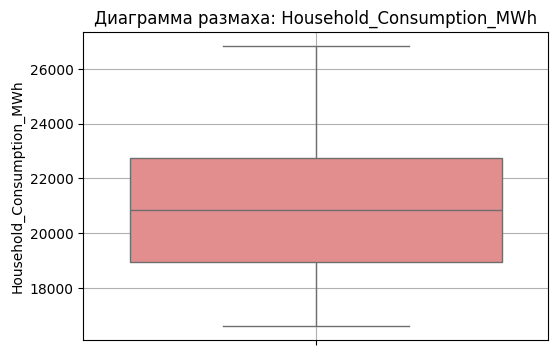

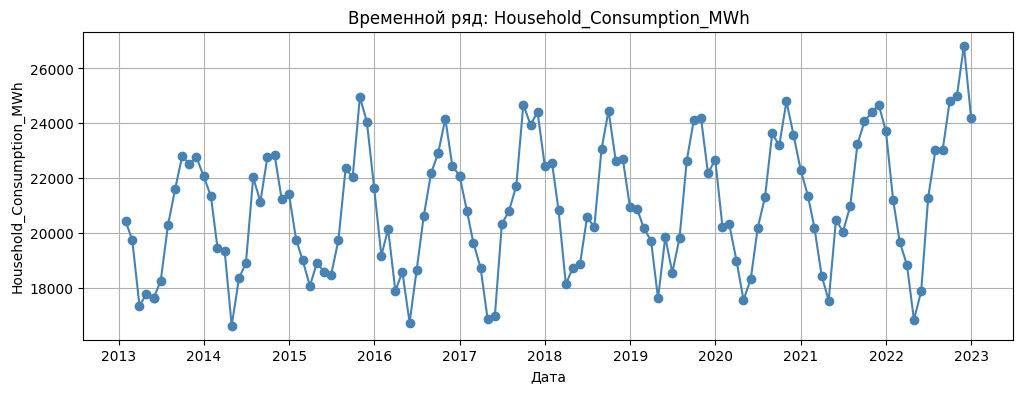

In [18]:
col = 'Household_Consumption_MWh'

# Проходим по всем строкам с пропусками
col = 'Household_Consumption_MWh'

for idx in df[df[col].isna()].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Найдём данные за тот же месяц, но в другие годы
    similar_months = df[(df['Month'] == month) & (df['Year'] != year) & (df[col].notna())]

    if similar_months.empty or similar_months['Year'].nunique() < 2:
        # Если недостаточно данных для тренда — пропускаем или заполняем средним по всему столбцу
        df.loc[idx, col] = df[col].mean()
        continue

    # Среднее по этому месяцу
    avg_month_value = similar_months[col].mean()

    # Линейная регрессия: тренд по годам
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]

    year_diff = year - similar_months['Year'].mean()
    adjusted_value = avg_month_value + coef * year_diff

    df.loc[idx, col] = adjusted_value


analyze_feature(df, 'Household_Consumption_MWh')

### Анализ средней температуры

Минимум: -15.45
Максимум: 40.05
Среднее: 11.27
Медиана: 11.30
Мода: 0.74
Стандартное отклонение: 8.09
Количество пропусков: 2


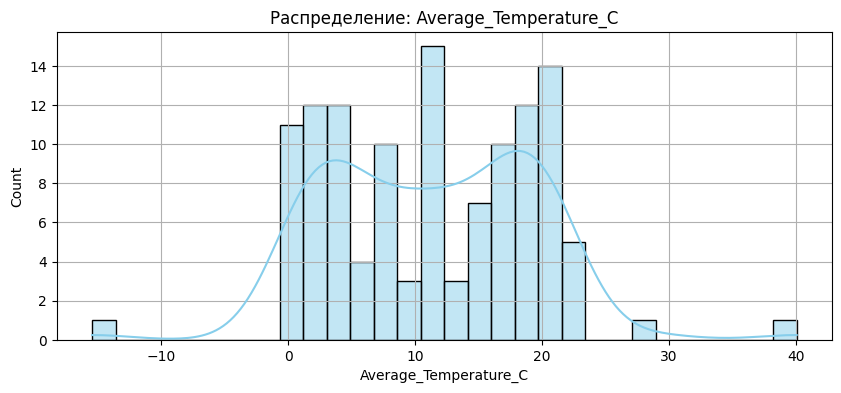

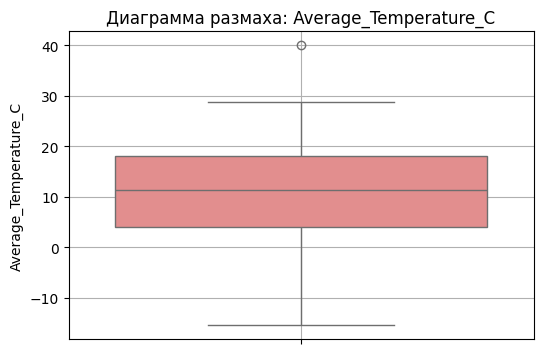

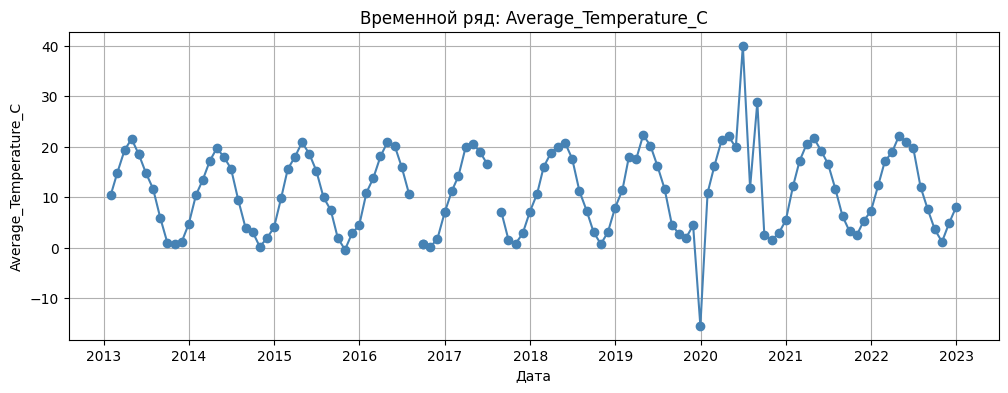

In [19]:
analyze_feature(df, 'Average_Temperature_C')

Q1: 4.25, Q3: 18.00, IQR: 13.75
Нижняя граница: -16.38, Верхняя граница: 38.62
Количество выбросов: 0


,Date,Industry_Consumption_MWh,Household_Consumption_MWh,Average_Temperature_C,Daylight_Hours,Year,Month


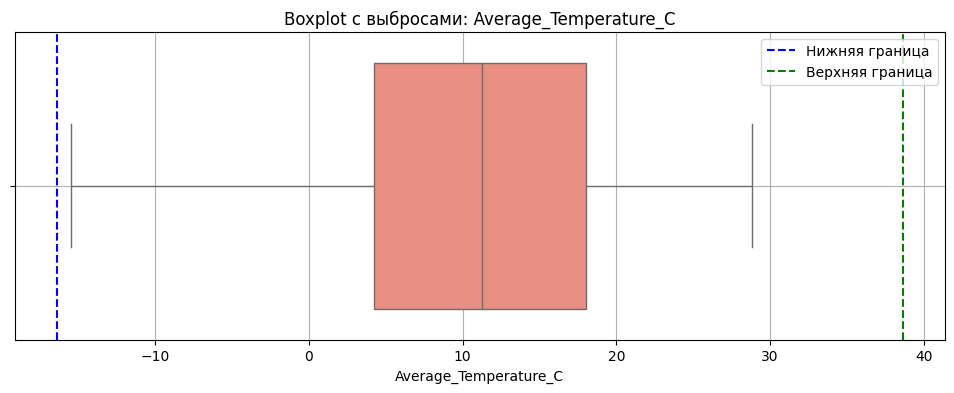

In [26]:
# Выбираем признак
col = 'Average_Temperature_C'

# Вычисляем квартильные значения
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}')
print(f'Нижняя граница: {lower_bound:.2f}, Верхняя граница: {upper_bound:.2f}')

# Определение выбросов
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f'Количество выбросов: {len(outliers)}')

# Вывод строк с выбросами
display(outliers)

# Визуализация
plt.figure(figsize=(12, 4))
sns.boxplot(x=df[col], color='salmon')
plt.title(f'Boxplot с выбросами: {col}')
plt.axvline(lower_bound, color='blue', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='green', linestyle='--', label='Верхняя граница')
plt.legend()
plt.grid(True)
plt.show()

Минимум: -15.45
Максимум: 28.86
Среднее: 11.06
Медиана: 11.25
Мода: 0.74
Стандартное отклонение: 7.61
Количество пропусков: 0


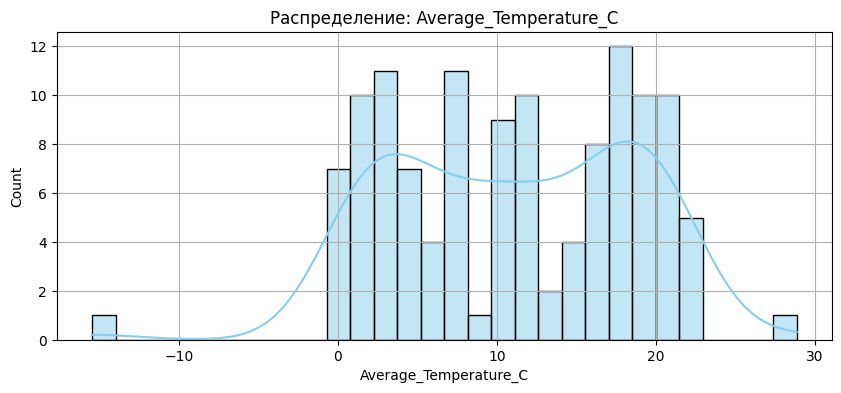

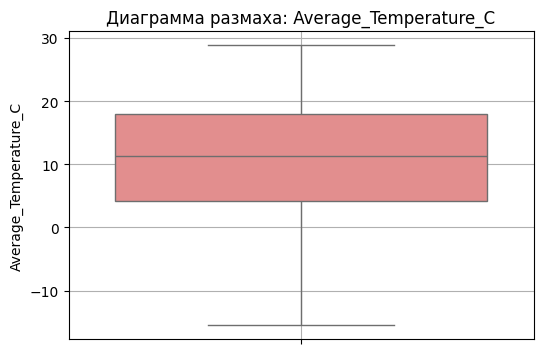

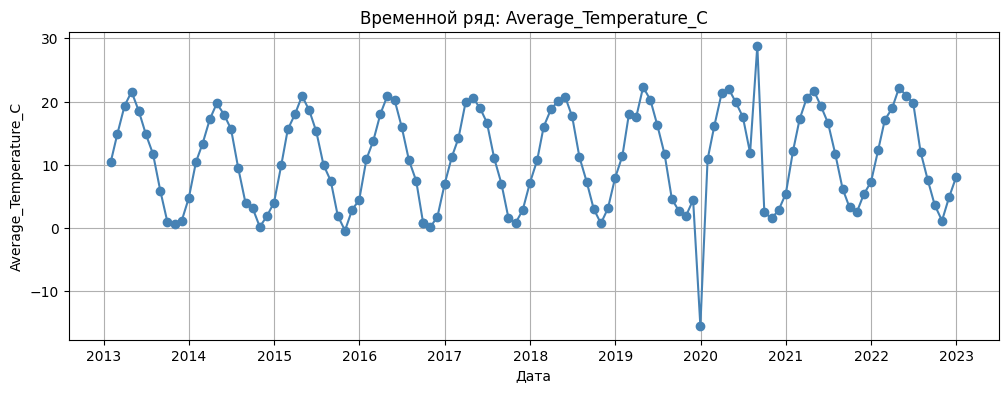

In [27]:
import numpy as np

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


# Повтор вычислений границ выбросов (как раньше)
col = 'Average_Temperature_C'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Строки с выбросами
outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)

# Заменяем выбросы на среднее по другим годам того же месяца
for idx in df[outlier_mask].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Все значения за этот месяц, кроме текущего года
    similar_months = df[(df['Month'] == month) & (df['Year'] != year)]

    # Вычисляем среднее значение
    avg_month_value = similar_months[col].mean()

    # Коррекция на тренд: линейная модель по году
    year_diff = year - similar_months['Year'].mean()
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]  # коэффициент наклона

    adjusted_value = avg_month_value + coef * year_diff

    # Обновляем значение
    df.loc[idx, col] = adjusted_value

analyze_feature(df, 'Average_Temperature_C')   

Минимум: -15.45
Максимум: 28.86
Среднее: 11.06
Медиана: 11.25
Мода: 0.74
Стандартное отклонение: 7.61
Количество пропусков: 0


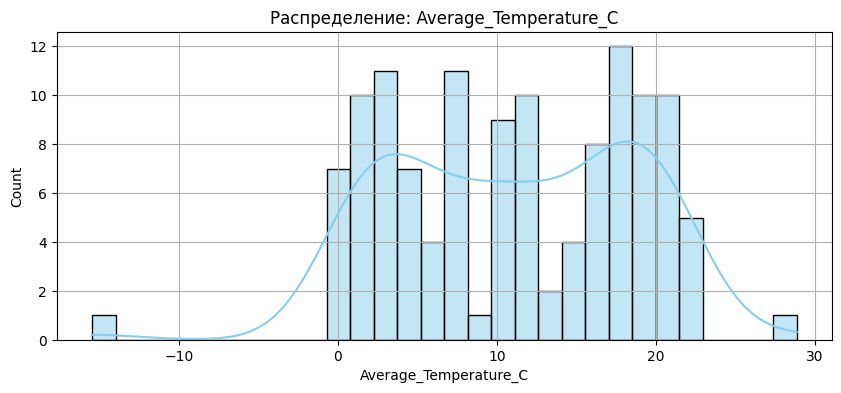

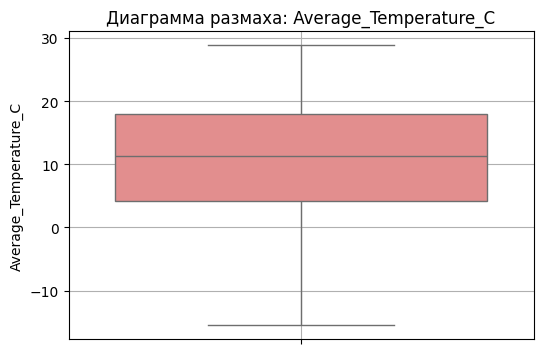

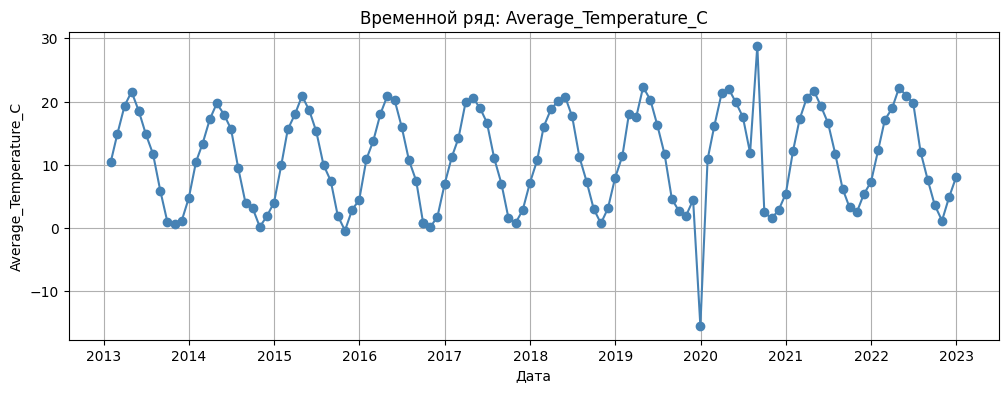

In [24]:
col = 'Average_Temperature_C'

# Проходим по всем строкам с пропусками
col = 'Average_Temperature_C'

for idx in df[df[col].isna()].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Найдём данные за тот же месяц, но в другие годы
    similar_months = df[(df['Month'] == month) & (df['Year'] != year) & (df[col].notna())]

    if similar_months.empty or similar_months['Year'].nunique() < 2:
        # Если недостаточно данных для тренда — пропускаем или заполняем средним по всему столбцу
        df.loc[idx, col] = df[col].mean()
        continue

    # Среднее по этому месяцу
    avg_month_value = similar_months[col].mean()

    # Линейная регрессия: тренд по годам
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]

    year_diff = year - similar_months['Year'].mean()
    adjusted_value = avg_month_value + coef * year_diff

    df.loc[idx, col] = adjusted_value


analyze_feature(df, 'Average_Temperature_C')

### Анализ средней длины светового дня

Минимум: 7.59
Максимум: 16.64
Среднее: 12.06
Медиана: 12.13
Мода: 9.10
Стандартное отклонение: 2.87
Количество пропусков: 1


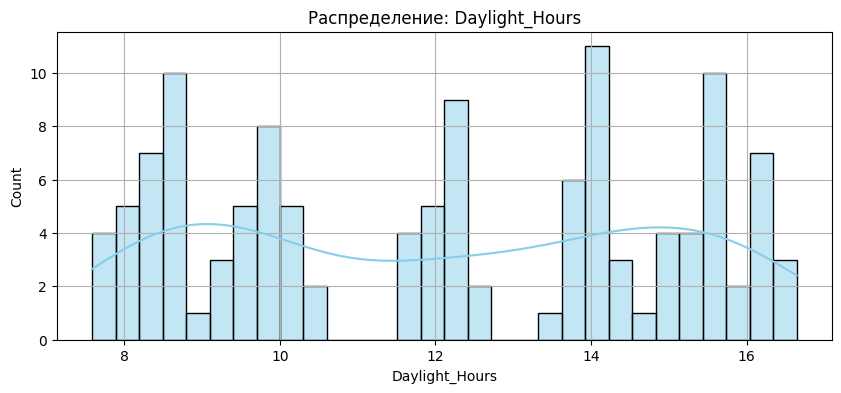

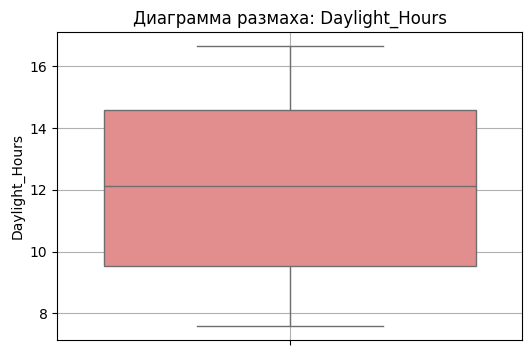

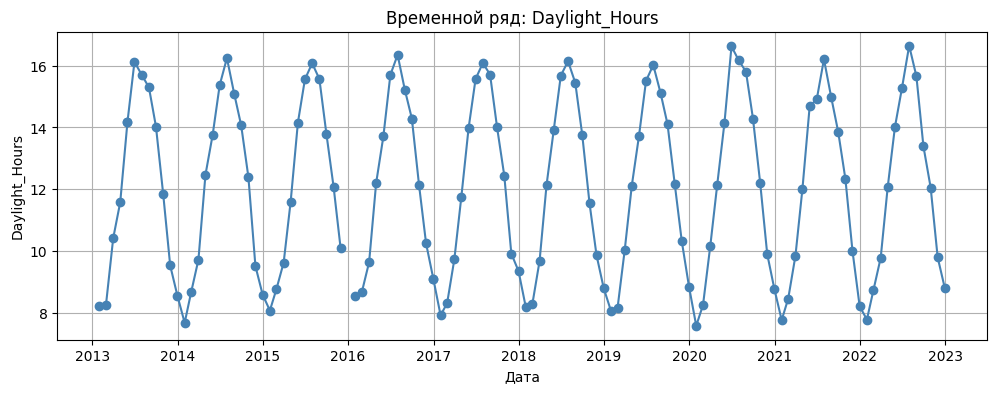

In [23]:
analyze_feature(df, 'Daylight_Hours')

col = 'Daylight_Hours'

# Проходим по всем строкам с пропусками
col = 'Daylight_Hours'

for idx in df[df[col].isna()].index:
    row = df.loc[idx]
    year = row['Year']
    month = row['Month']

    # Найдём данные за тот же месяц, но в другие годы
    similar_months = df[(df['Month'] == month) & (df['Year'] != year) & (df[col].notna())]

    if similar_months.empty or similar_months['Year'].nunique() < 2:
        # Если недостаточно данных для тренда — пропускаем или заполняем средним по всему столбцу
        df.loc[idx, col] = df[col].mean()
        continue

    # Среднее по этому месяцу
    avg_month_value = similar_months[col].mean()

    # Линейная регрессия: тренд по годам
    yearly_trend = similar_months.groupby('Year')[col].mean().reset_index()
    coef = np.polyfit(yearly_trend['Year'], yearly_trend[col], deg=1)[0]

    year_diff = year - similar_months['Year'].mean()
    adjusted_value = avg_month_value + coef * year_diff

    df.loc[idx, col] = adjusted_value


analyze_feature(df, 'Daylight_Hours')

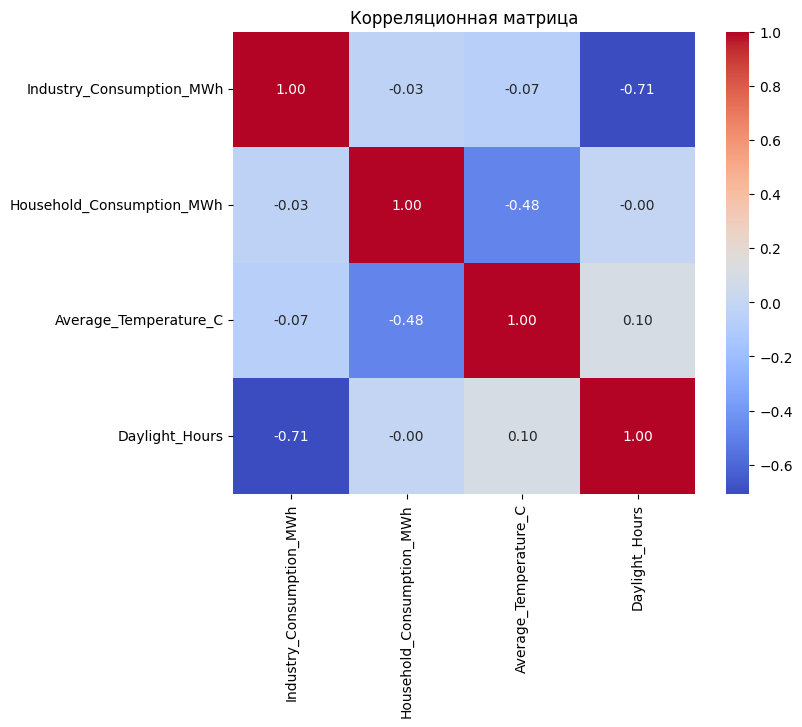

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Только числовые столбцы
numerical_features = ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']

# Матрица корреляций
corr_matrix = df[numerical_features].corr()

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Корреляционная матрица")
plt.show()


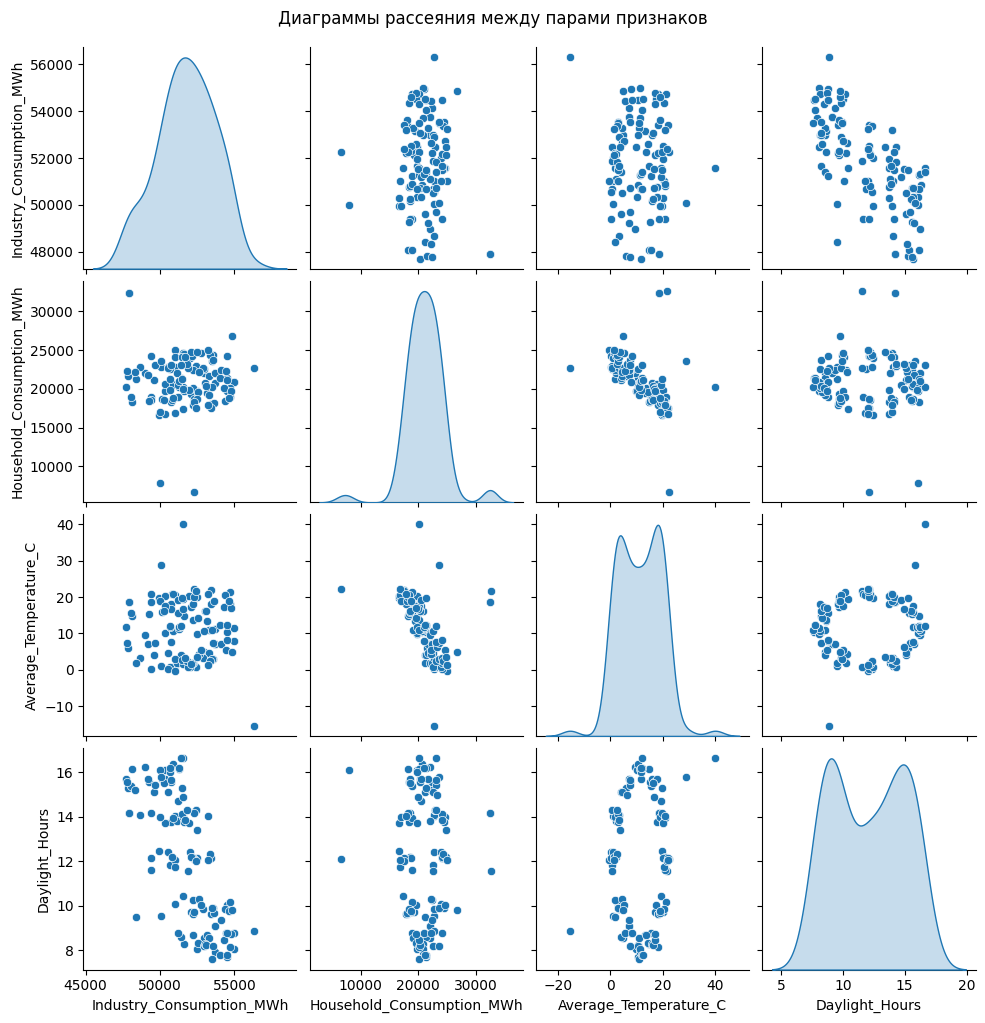

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем нужные числовые признаки
features = ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 
            'Average_Temperature_C', 'Daylight_Hours']

# Удаляем пропуски, чтобы не мешали при отрисовке
sns.pairplot(df[features], diag_kind='kde')
plt.suptitle('Диаграммы рассеяния между парами признаков', y=1.02)
plt.show()


In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df, features):
    """
    df — DataFrame с данными
    features — список названий столбцов для проверки VIF
    """
    X = df[features].dropna()  # удаляем пропуски, если есть
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(features))]
    return vif_data

# Пример использования:
numerical_features = ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']
vif_df = calculate_vif(df, numerical_features)
print(vif_df)



                     feature        VIF
0   Industry_Consumption_MWh  75.062587
1  Household_Consumption_MWh  69.225662
2      Average_Temperature_C   4.225831
3             Daylight_Hours  17.665532


In [153]:
from scipy.stats import shapiro

for col in ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']:
    stat, p = shapiro(df[col].dropna())
    print(f'{col}: статистика={stat:.3f}, p-значение={p:.3f}')
    if p > 0.05:
        print(f"  Распределение {col} похоже на нормальное\n")
    else:
        print(f"  Распределение {col} НЕ является нормальным\n")


Industry_Consumption_MWh: статистика=0.983, p-значение=0.132
  Распределение Industry_Consumption_MWh похоже на нормальное

Household_Consumption_MWh: статистика=0.886, p-значение=0.000
  Распределение Household_Consumption_MWh НЕ является нормальным

Average_Temperature_C: статистика=0.948, p-значение=0.000
  Распределение Average_Temperature_C НЕ является нормальным

Daylight_Hours: статистика=0.914, p-значение=0.000
  Распределение Daylight_Hours НЕ является нормальным



In [154]:
from statsmodels.tsa.stattools import adfuller

for col in ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']:
    result = adfuller(df[col].dropna())
    print(f'{col}: p-значение={result[1]:.3f}')
    if result[1] < 0.05:
        print(f"  Ряд {col} стационарен\n")
    else:
        print(f"  Ряд {col} НЕ стационарен\n")


Industry_Consumption_MWh: p-значение=0.845
  Ряд Industry_Consumption_MWh НЕ стационарен

Household_Consumption_MWh: p-значение=0.000
  Ряд Household_Consumption_MWh стационарен

Average_Temperature_C: p-значение=0.047
  Ряд Average_Temperature_C стационарен

Daylight_Hours: p-значение=0.000
  Ряд Daylight_Hours стационарен



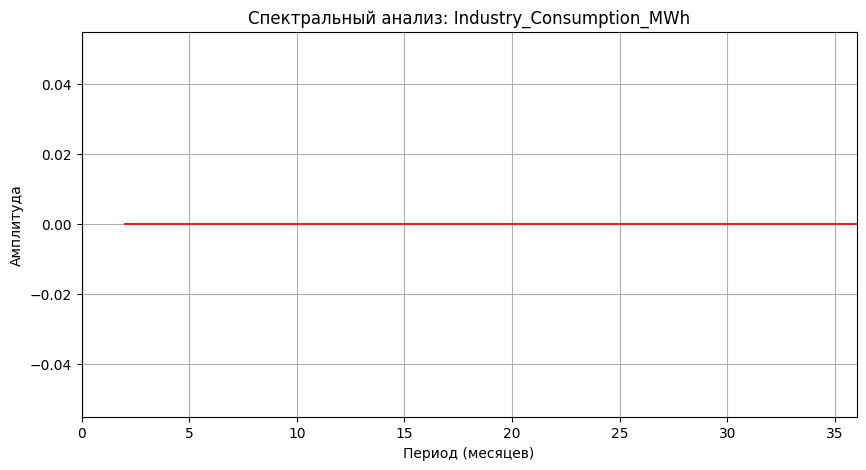

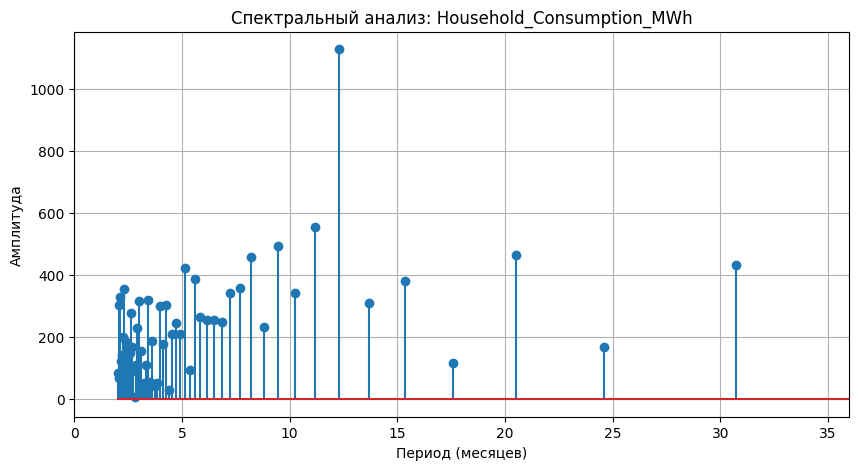

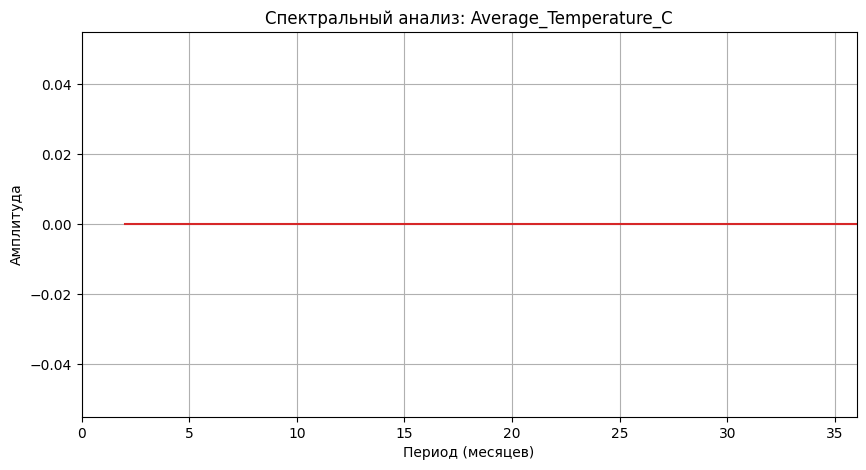

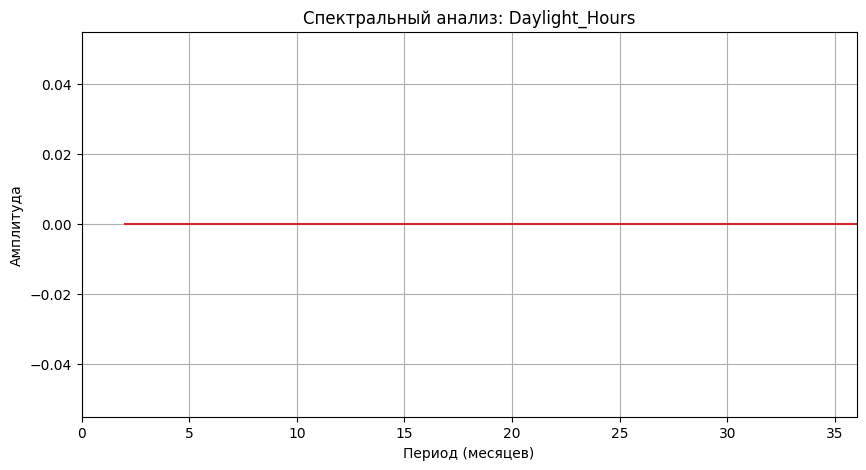

In [155]:
import numpy as np
import matplotlib.pyplot as plt

def spectral_analysis(series, title, sampling_rate=1):
    # series — временной ряд (pandas Series)
    # sampling_rate — частота дискретизации (здесь 1, т.к. месячные данные)

    n = len(series)
    yf = np.fft.fft(series - np.mean(series))  # убираем среднее для центрирования
    xf = np.fft.fftfreq(n, d=sampling_rate)

    # Амплитуда (модуль комплексных чисел)
    amplitude = np.abs(yf) / n

    # Берём только положительные частоты
    pos_mask = xf > 0
    xf = xf[pos_mask]
    amplitude = amplitude[pos_mask]

    # Переводим частоты в периоды (кол-во месяцев на цикл)
    periods = 1 / xf

    plt.figure(figsize=(10,5))
    plt.stem(periods, amplitude)
    plt.xlabel('Период (месяцев)')
    plt.ylabel('Амплитуда')
    plt.title(f'Спектральный анализ: {title}')
    plt.xlim(0, 36)  # Ограничим до 3 лет для удобства
    plt.grid(True)
    plt.show()

# Пример вызова функции для каждого признака
for col in ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 'Average_Temperature_C', 'Daylight_Hours']:
    spectral_analysis(df[col], col)


In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_decomposition(series, title, model='additive', period=12):
    result = seasonal_decompose(series.dropna(), model=model, period=period)

    # Создаём увеличенную фигуру
    fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

    # Отдельно рисуем каждую компоненту
    result.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    axes[0].set_title(f'{title} — Декомпозиция временного ряда')

    result.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')

    result.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')

    result.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()



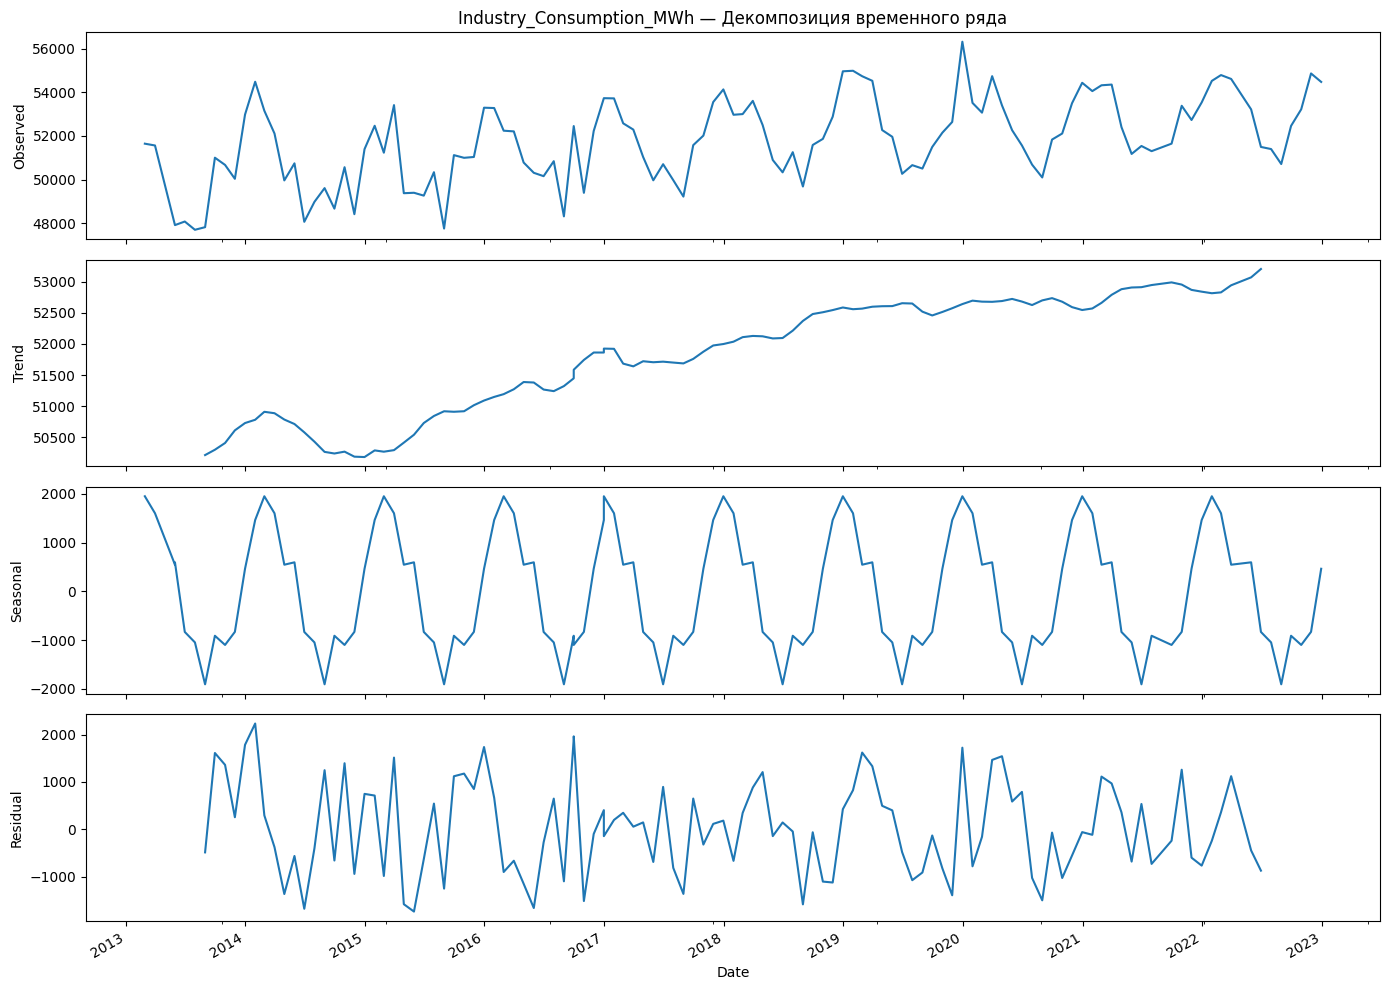

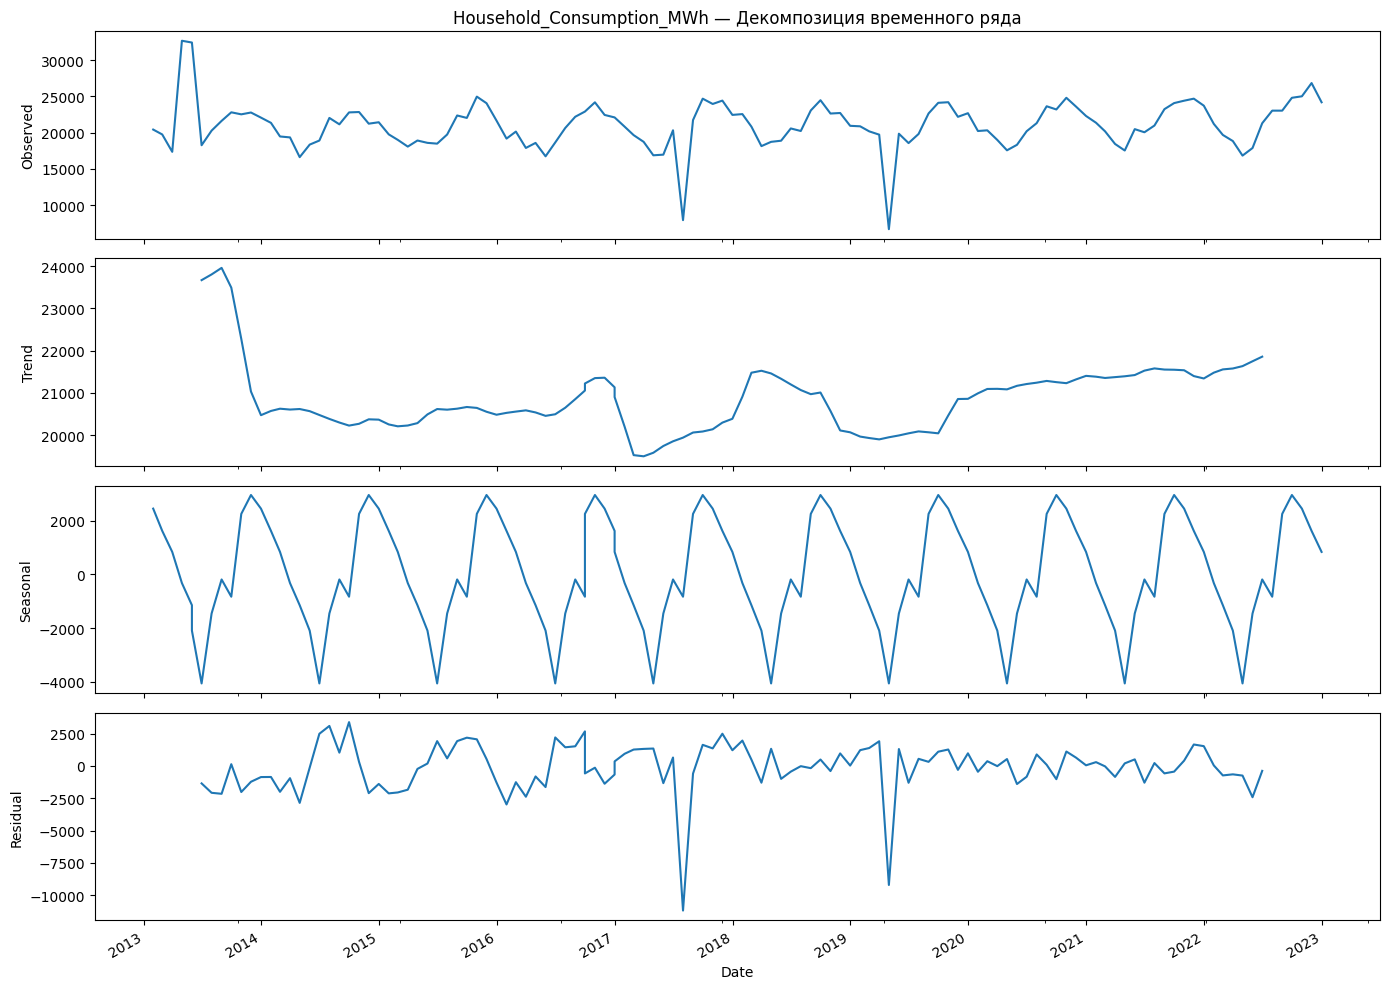

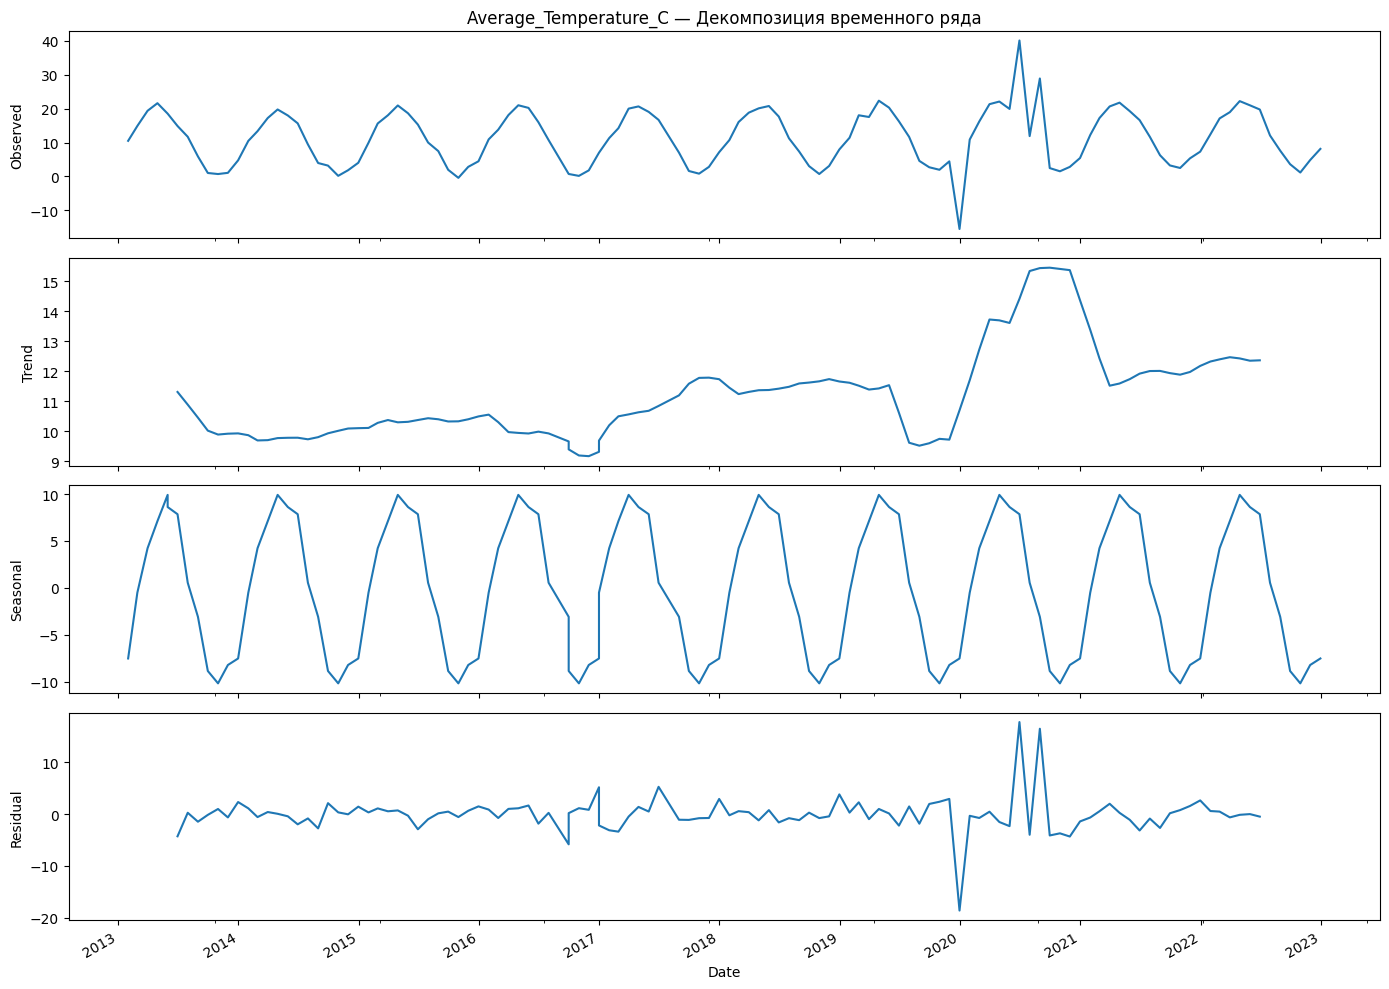

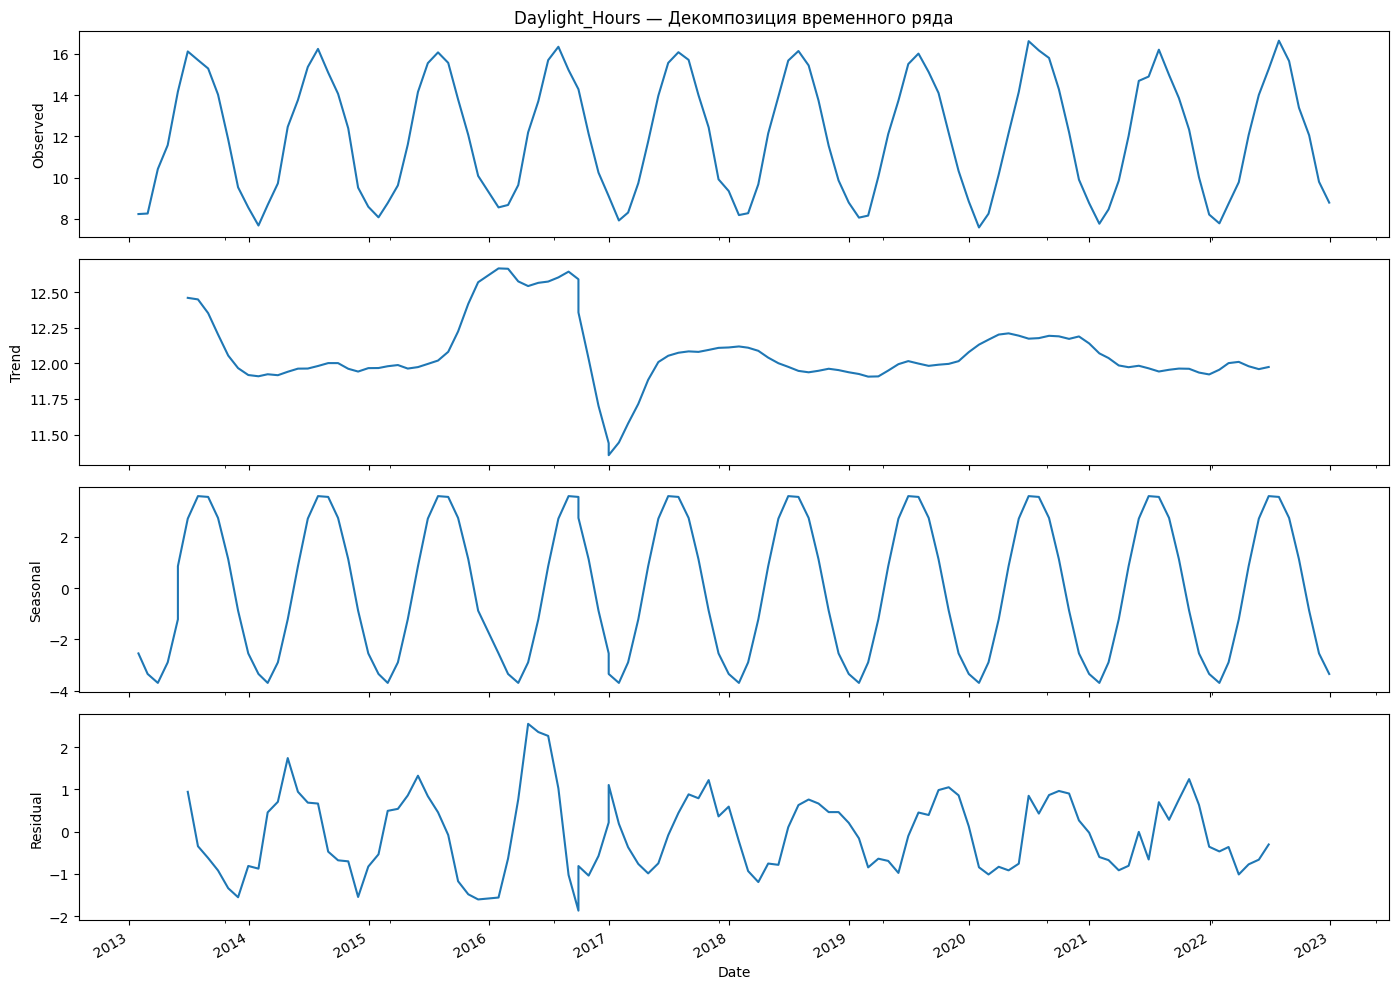

In [157]:
df = df.sort_values('Date')  # на всякий случай
df_temp = df.set_index('Date')

for col in ['Industry_Consumption_MWh', 'Household_Consumption_MWh', 
            'Average_Temperature_C', 'Daylight_Hours']:
    plot_decomposition(df_temp[col], col)
